In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


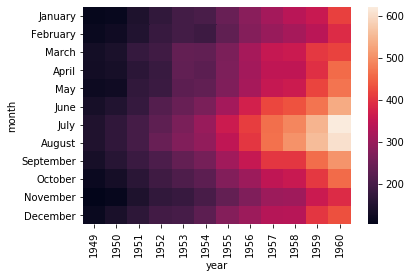

In [6]:
sns.heatmap(flight_dframe)

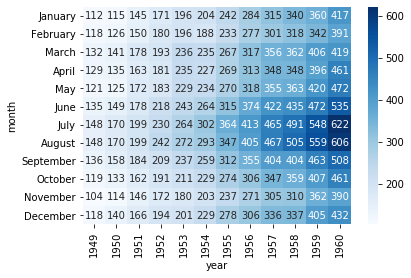

In [11]:
sns.heatmap(flight_dframe,annot=True,fmt='d',cmap='Blues')

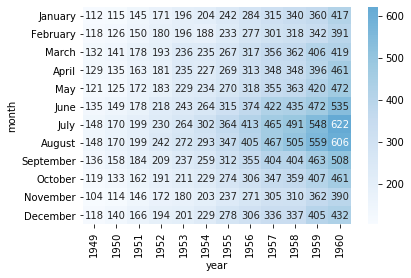

In [12]:
sns.heatmap(flight_dframe,annot=True,fmt='d',cmap='Blues',center=flight_dframe.loc['August',1960])

In [13]:
#new_col = flight_dframe.columns.map(str)

In [25]:
yearly_flights = flight_dframe.sum()
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [26]:
# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)


In [27]:
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [28]:
year_dframe.index = year_dframe['Year']
del year_dframe['Year']
year_dframe

,Flights
Year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


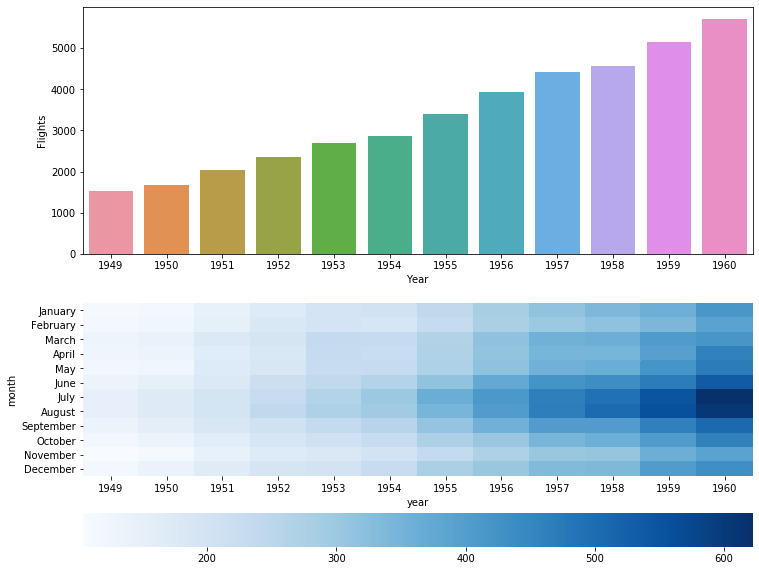

In [33]:
f, (axis1,axis2) = plt.subplots(2,1,figsize=(12, 10))

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot(x = 'Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,ax=axis2,cmap = 'Blues',cbar_kws={'orientation':'horizontal'})


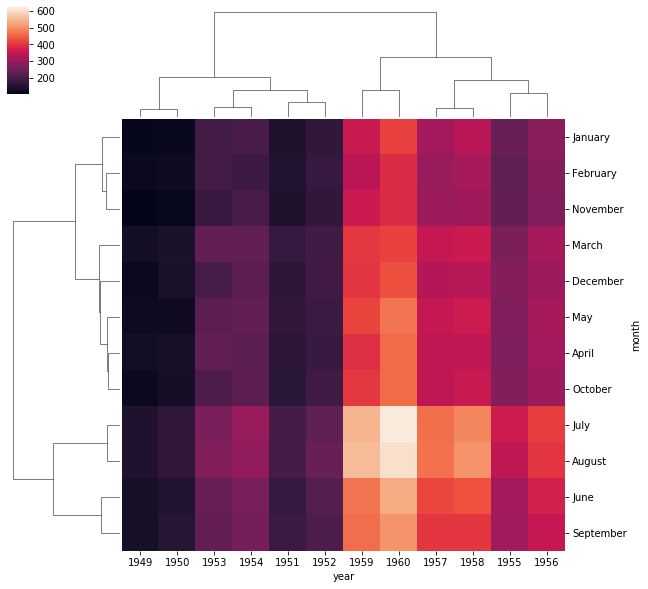

In [116]:
sns.clustermap(flight_dframe)

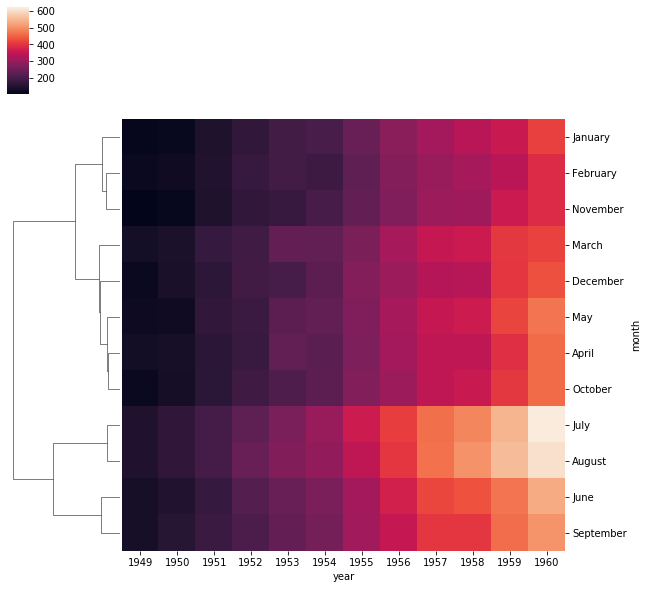

In [117]:
sns.clustermap(flight_dframe,col_cluster=False)

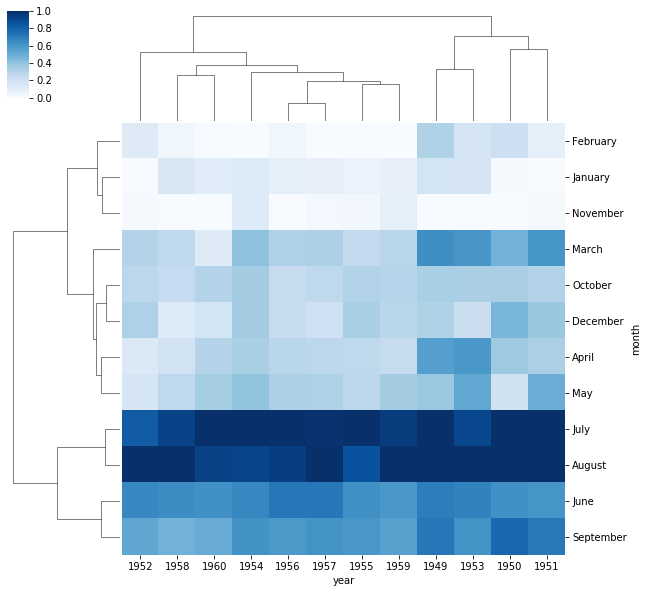

In [119]:
sns.clustermap(flight_dframe,standard_scale=1,cmap = 'Blues')

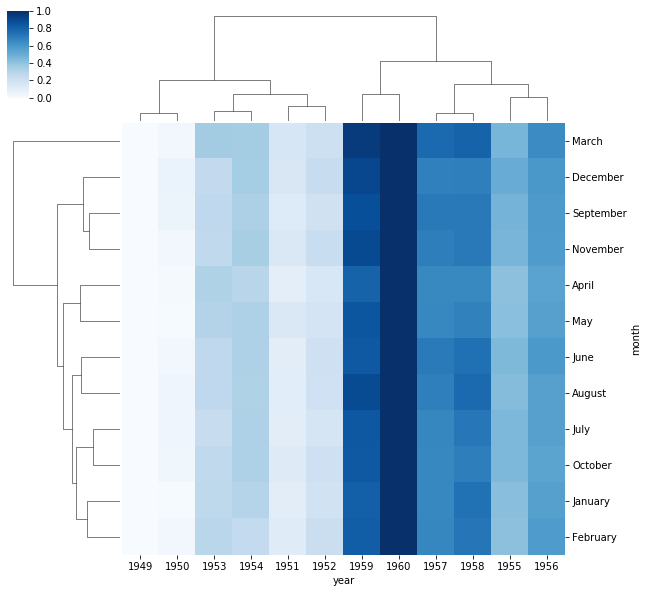

In [120]:
sns.clustermap(flight_dframe,standard_scale=0,cmap = 'Blues')

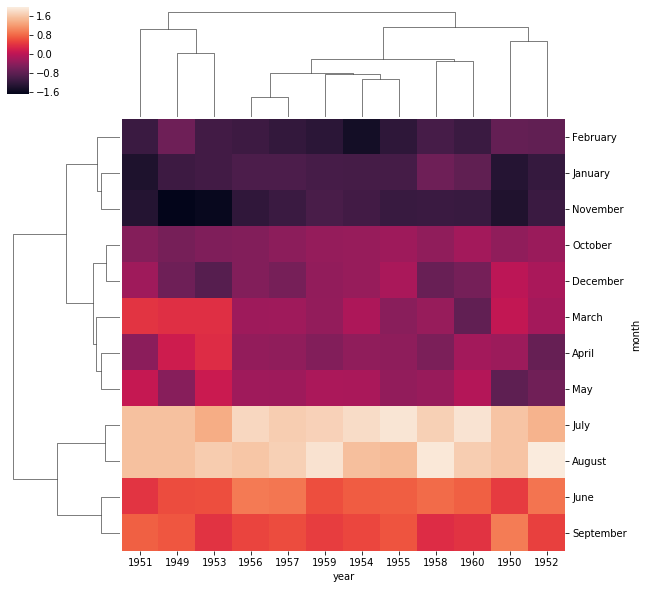

In [121]:
sns.clustermap(flight_dframe,z_score=1)